<a href="https://colab.research.google.com/github/Some7hing0riginal/lighthouselabs-midterm1/blob/main/Mid_Term_Light_Version_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timezone
import time
import pytz
from sqlalchemy import create_engine
from oauth2client.client import GoogleCredentials
from google.colab import drive
from google.colab import auth
auth.authenticate_user()
import gspread


zone_mtl = pytz.timezone('America/Montreal')
date_mtl = datetime.now(zone_mtl)
date_mtl
gs_row=1
gs_col=1



gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1C5CKkVvInTiP9XRtuSjjgvSDu-a7RNgwhNQtjAYrWXI/edit#gid=0')
worksheet = wb.add_worksheet(title='LOG-'+str(date_mtl), rows="100", cols="20")


drive.mount('/gdrive') # you may have to authentificate , follow the process of the browser window
#change this
# file_path = '/gdrive/MyDrive/lhl/Mid_Term/flights_2019.csv'
file_path ='/gdrive/MyDrive/lhl/Mid_Term/flights_18-19_OCT_NOV_DEC_RIGHT_BEFORE_TRAINING.csv'

# df = pd.read_csv(file_path,header=0,skiprows=range(1,6000000),nrows=3000000)
df = pd.read_csv(file_path)#

Mounted at /gdrive


In [2]:


def train_test_split(df,features_list,target,gs_row,worksheet):
    
    
    from sklearn.model_selection import train_test_split# Import train_test_split function
    gs_col =1
    code_block_name = "train_test_split"
    dateTimeObj = datetime.now()
    worksheet.update_cell(gs_row,gs_col,code_block_name)
    worksheet.update_cell(gs_row,gs_col+1,'Started')
    worksheet.update_cell(gs_row,gs_col+2,str(dateTimeObj))

    X=df[features_list]  # Features
    y=df[target]  # Target
    import statsmodels.api as sm
    X = sm.add_constant(X)
    print(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
    
    dateTimeObj = datetime.now()
    worksheet.update_cell(gs_row,gs_col+3,'Finished')
    worksheet.update_cell(gs_row,gs_col+4,str(dateTimeObj))
    

    return X_train, X_test, y_train, y_test

def train_model(X_train,y_train,gs_row,worksheet):
   
    gs_col =1
    code_block_name = "train_model sm.OLS(y_train,X_train)"
    dateTimeObj = datetime.now()
    worksheet.update_cell(gs_row,gs_col,code_block_name)
    worksheet.update_cell(gs_row,gs_col+1,'Started')
    worksheet.update_cell(gs_row,gs_col+2,str(dateTimeObj))
   
    
    import statsmodels.api as sm
    print("lin_reg = sm.OLS(X_train,y_train)")
    lin_reg = sm.OLS(y_train.astype(float),X_train.astype(float)) #OLS is the most popular.
    print("model = lin_reg.fit()")
    model = lin_reg.fit()
    print("print_model = model.summary()")
    print_model = model.summary()
    print(print_model)
   
   
    from sklearn.linear_model import LinearRegression
   
    gs_col =1
    code_block_name = "train_model regressor = LinearRegression()"
    dateTimeObj = datetime.now()
    worksheet.update_cell(gs_row,gs_col,code_block_name)
    worksheet.update_cell(gs_row,gs_col+1,'Started')
    worksheet.update_cell(gs_row,gs_col+2,str(dateTimeObj))

    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    print("regressor.coef_")
    print(regressor.coef_)
    print(regressor.score(X_train,y_train))
    
    gs_col =1
    code_block_name = "train_model  = RandomForestRegressor()"
    dateTimeObj = datetime.now()
    worksheet.update_cell(gs_row,gs_col,code_block_name)
    worksheet.update_cell(gs_row,gs_col+1,'Started')
    worksheet.update_cell(gs_row,gs_col+2,str(dateTimeObj))


    from sklearn.ensemble import RandomForestRegressor

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    dateTimeObj = datetime.now()
    worksheet.update_cell(gs_row,gs_col+3,'Finished')
    worksheet.update_cell(gs_row,gs_col+4,str(dateTimeObj))
 

    return model


def predict_results(model,X_train,gs_row,worksheet):
    gs_col =1
    code_block_name = "predict_results"
    dateTimeObj = datetime.now()
    worksheet.update_cell(gs_row,gs_col,code_block_name)
    worksheet.update_cell(gs_row,gs_col+1,'Started')
    worksheet.update_cell(gs_row,gs_col+2,str(dateTimeObj))
    
    y_pred=model.predict(X_train)
    
    dateTimeObj = datetime.now()
    worksheet.update_cell(gs_row,gs_col+3,'Finished')
    worksheet.update_cell(gs_row,gs_col+4,str(dateTimeObj))
    

    return y_pred

def score_this(model,y_train,y_pred,features_list,gs_row,worksheet):
    

    gs_col =1
    #Import scikit-learn metrics module for accuracy calculation
    from sklearn.metrics import r2_score
    # Model Accuracy, how often is the classifier correct?
    ModelAccuracy =("Accuracy:",r2_score(y_train, y_pred))

    #Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
 
    import time
    import numpy as np
    from sklearn import metrics
   
    Mean_Absolute_Error = metrics.mean_absolute_error(y_train, y_pred)  
    Mean_Squared_Error = metrics.mean_squared_error(y_train, y_pred)  
    Root_Mean_Squared_Error = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    
    print("Mean_Absolute_Error")
    print(Mean_Absolute_Error)
    print("Mean_Squared_Error")
    print(Mean_Absolute_Error)
    print("Root_Mean_Squared_Error")
    print(Root_Mean_Squared_Error)

    worksheet.update_cell(gs_row,gs_col,str(ModelAccuracy))
    worksheet.update_cell(gs_row+1,gs_col,str(Mean_Absolute_Error))
    worksheet.update_cell(gs_row+2,gs_col,str(Mean_Squared_Error))
    worksheet.update_cell(gs_row+3,gs_col,str(Root_Mean_Squared_Error))

    worksheet.update_cell(gs_row+4,gs_col,str(len(df)))
    worksheet.update_cell(gs_row+5,gs_col,str(list(features_list)))
    worksheet.update_cell(gs_row+6,gs_col,str(model.get_params()))
    
    # Evaluating the Algorithm


    start_time = time.time()
    importances = model.feature_importances_
    std = np.std([
        tree.feature_importances_ for tree in model.estimators_], axis=0)
    elapsed_time = time.time() - start_time

    print(f"Elapsed time to compute the importances: "
        f"{elapsed_time:.3f} seconds")
    import pandas as pd
    print("features_list.insert(0, 'const')")
    features_list.insert(0, 'const')  
    print("NEXT LINE IS forest_importances = pd.Series(importances, index=features_list)")
    print(" this number of features " + len(features_list))
    forest_importances = pd.Series(importances, index=features_list)
    print("features_list.pop(0)")
    features_list.pop(0)  
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    plt.show()
    from sklearn import metrics
    #Simple calculation of Adj. R2

    from datetime import datetime
    
    return ModelAccuracy,Mean_Absolute_Error,Mean_Squared_Error,Root_Mean_Squared_Error

# def filter_this(df,arr_delay_cutoff,gs_row,worksheet):
#     cancelled_filter = (
#     (df['cancelled'] !=0) | 
#     (df['diverted'] !=0 ) | 
#     (df['arr_delay'] >arr_delay_cutoff )
#     )
#     df.drop(df[cancelled_filter].index,inplace=True)

#     return df

150
         const  c_crs_arr_hour  c_crs_dep_hour
0          1.0              11               9
1          1.0              10               8
2          1.0              11               9
3          1.0              14              12
4          1.0              13              12
...        ...             ...             ...
2587140    1.0               9               5
2587141    1.0               9               7
2587142    1.0              11               9
2587143    1.0              23              22
2587144    1.0              10               7

[1229281 rows x 3 columns]
lin_reg = sm.OLS(X_train,y_train)
model = lin_reg.fit()
print_model = model.summary()
                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3653.
Da

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean_Absolute_Error
13.987927566353594
Mean_Squared_Error
13.987927566353594
Root_Mean_Squared_Error
18.472742359080808
Elapsed time to compute the importances: 0.013 seconds


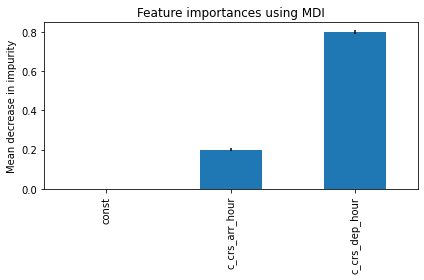

         const  c_crs_arr_hour
0          1.0              11
1          1.0              10
2          1.0              11
3          1.0              14
4          1.0              13
...        ...             ...
2587140    1.0               9
2587141    1.0               9
2587142    1.0              11
2587143    1.0              23
2587144    1.0              10

[1229281 rows x 2 columns]
lin_reg = sm.OLS(X_train,y_train)
model = lin_reg.fit()
print_model = model.summary()
                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3944.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:32:07   Log-Likelihood:            -3.7342e+06
No. Observations:              860496   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean_Absolute_Error
13.995789133140743
Mean_Squared_Error
13.995789133140743
Root_Mean_Squared_Error
18.512430585297423
Elapsed time to compute the importances: 0.012 seconds


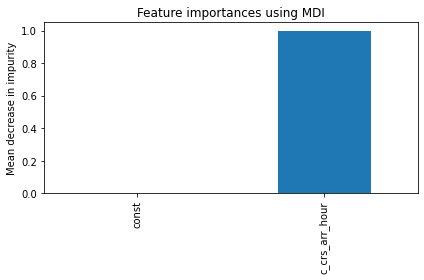

30
         const  c_crs_arr_hour  c_crs_dep_hour
0          1.0              11               9
1          1.0              10               8
2          1.0              11               9
3          1.0              14              12
4          1.0              13              12
...        ...             ...             ...
2587140    1.0               9               5
2587141    1.0               9               7
2587142    1.0              11               9
2587143    1.0              23              22
2587144    1.0              10               7

[1153228 rows x 3 columns]
lin_reg = sm.OLS(X_train,y_train)
model = lin_reg.fit()
print_model = model.summary()
                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1413.
Dat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean_Absolute_Error
11.37123673482059
Mean_Squared_Error
11.37123673482059
Root_Mean_Squared_Error
14.417834035087346
Elapsed time to compute the importances: 0.013 seconds


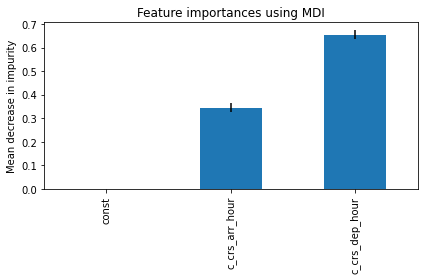

         const  c_crs_arr_hour
0          1.0              11
1          1.0              10
2          1.0              11
3          1.0              14
4          1.0              13
...        ...             ...
2587140    1.0               9
2587141    1.0               9
2587142    1.0              11
2587143    1.0              23
2587144    1.0              10

[1153228 rows x 2 columns]
lin_reg = sm.OLS(X_train,y_train)
model = lin_reg.fit()
print_model = model.summary()
                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1365.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          1.77e-298
Time:                        00:33:20   Log-Likelihood:            -3.3021e+06
No. Observations:              807259   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean_Absolute_Error
11.379071685716047
Mean_Squared_Error
11.379071685716047
Root_Mean_Squared_Error
14.448802597626718
Elapsed time to compute the importances: 0.012 seconds


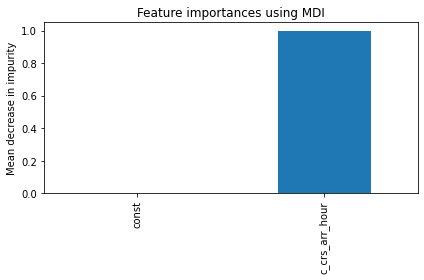

20
         const  c_crs_arr_hour  c_crs_dep_hour
0          1.0              11               9
1          1.0              10               8
2          1.0              11               9
3          1.0              14              12
4          1.0              13              12
...        ...             ...             ...
2587140    1.0               9               5
2587141    1.0               9               7
2587142    1.0              11               9
2587143    1.0              23              22
2587144    1.0              10               7

[1099699 rows x 3 columns]
lin_reg = sm.OLS(X_train,y_train)
model = lin_reg.fit()
print_model = model.summary()
                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     736.4
Dat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean_Absolute_Error
10.249989717551626
Mean_Squared_Error
10.249989717551626
Root_Mean_Squared_Error
12.868145928004715
Elapsed time to compute the importances: 0.018 seconds


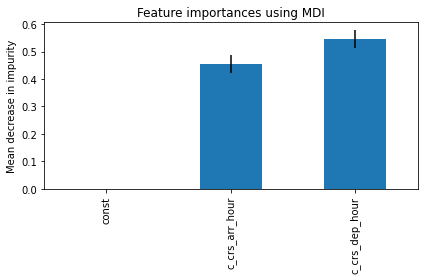

         const  c_crs_arr_hour
0          1.0              11
1          1.0              10
2          1.0              11
3          1.0              14
4          1.0              13
...        ...             ...
2587140    1.0               9
2587141    1.0               9
2587142    1.0              11
2587143    1.0              23
2587144    1.0              10

[1099699 rows x 2 columns]
lin_reg = sm.OLS(X_train,y_train)
model = lin_reg.fit()
print_model = model.summary()
                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     643.8
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          5.60e-142
Time:                        00:34:27   Log-Likelihood:            -3.0617e+06
No. Observations:              769789   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean_Absolute_Error
10.270351753990957
Mean_Squared_Error
10.270351753990957
Root_Mean_Squared_Error
12.905046892640447
Elapsed time to compute the importances: 0.011 seconds


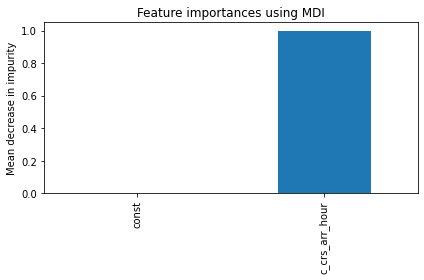

10
         const  c_crs_arr_hour  c_crs_dep_hour
0          1.0              11               9
1          1.0              10               8
2          1.0              11               9
3          1.0              14              12
4          1.0              13              12
...        ...             ...             ...
2587140    1.0               9               5
2587141    1.0               9               7
2587142    1.0              11               9
2587143    1.0              23              22
2587144    1.0              10               7

[1007462 rows x 3 columns]
lin_reg = sm.OLS(X_train,y_train)
model = lin_reg.fit()
print_model = model.summary()
                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     261.7
Dat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean_Absolute_Error
8.940364622648532
Mean_Squared_Error
8.940364622648532
Root_Mean_Squared_Error
11.168472769946952
Elapsed time to compute the importances: 0.013 seconds


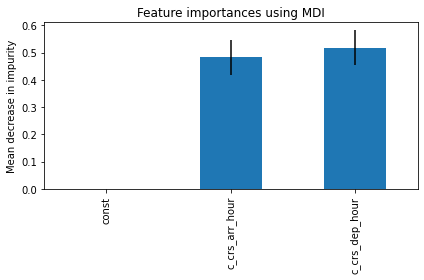

         const  c_crs_arr_hour
0          1.0              11
1          1.0              10
2          1.0              11
3          1.0              14
4          1.0              13
...        ...             ...
2587140    1.0               9
2587141    1.0               9
2587142    1.0              11
2587143    1.0              23
2587144    1.0              10

[1007462 rows x 2 columns]
lin_reg = sm.OLS(X_train,y_train)
model = lin_reg.fit()
print_model = model.summary()
                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     118.9
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           1.12e-27
Time:                        00:35:31   Log-Likelihood:            -2.7063e+06
No. Observations:              705223   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean_Absolute_Error
8.97219859675386
Mean_Squared_Error
8.97219859675386
Root_Mean_Squared_Error
11.223139054875547
Elapsed time to compute the importances: 0.012 seconds


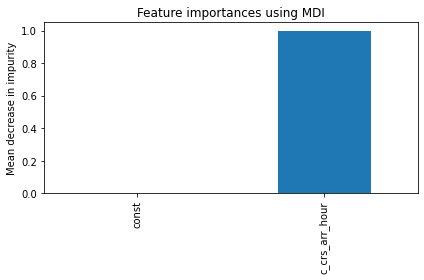

In [5]:
dateTimeObj = datetime.now()
import matplotlib.pyplot as plt
import copy




features_list_o=(['c_crs_arr_hour','c_crs_dep_hour'])#,
                  #'origwindspeedKmph','destwindspeedKmph','destPrecipMM','origPrecipMM','origVisibility','destVisibility','dayofweek_num','destWeatherCode','origWeatherCode','tail_num','month'])
# features_list_o=['dest_airport_id','origin_airport_id','c_crs_arr_hour','c_crs_dep_hour','dayofweek_num','haul','origwindspeedKmph','destwindspeedKmph','destPrecipMM','origPrecipMM','origVisibility','destVisibility','destWeatherCode','origWeatherCode','origAvgTempC','tail_num']



target=['arr_delay']

arr_delay_cutoff_list=[150,30,20,10] # The loop will loop thru the different delay types.
months_list=[12]


wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1D6jakWCOJjWmntTMr8erIS8zCYGP_WYNPOjRWRgHLCQ/edit#gid=0')



#check ça df[~df.country.isin(countries_to_keep)]
df_filter = (
df['month']!=12 #enter the month you want to keep ( applies to both years )
)
df.drop(df[df_filter].index,inplace=True)



# for m in range(len(months_list)):
for i in range(len(arr_delay_cutoff_list)):
    zone_mtl = pytz.timezone('America/Montreal')
    date_mtl = datetime.now(zone_mtl)

    gc = gspread.authorize(GoogleCredentials.get_application_default())
    wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1D6jakWCOJjWmntTMr8erIS8zCYGP_WYNPOjRWRgHLCQ/edit#gid=0')
    tabName = 'Jo-Training-'# Change the name so we can figure out what is what. 
    worksheet = wb.add_worksheet(title=tabName+str(arr_delay_cutoff_list[i])+" TS "+str(date_mtl), rows="1000", cols="20")


    gs_row = 1 
    gs_col = 1 
    print(arr_delay_cutoff_list[i])
    
    features_list = copy.deepcopy(features_list_o)

    cancelled_filter = (
    (df['cancelled'] !=0) | 
    (df['diverted'] !=0) | 
    (df['arr_delay'] >arr_delay_cutoff_list[i])
    )
    df.drop(df[cancelled_filter].index,inplace=True)
    # df = filter_this(df,arr_delay_cutoff_list[i],gs_row,worksheet)
    
    dflen=len(df)
    
    
    worksheet.update_cell(gs_row,gs_col,
                            'Delay >' + str(arr_delay_cutoff_list[i]))
    gs_row += 1  
    worksheet.update_cell(gs_row,gs_col,
                            'Month = ' +str(months_list))
    gs_row += 1  
    worksheet.update_cell(gs_row,gs_col,
                            'DF number of rows ' + str(dflen))
    gs_row += 1 
    
             

    for each in range(len(features_list)):
        wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1D6jakWCOJjWmntTMr8erIS8zCYGP_WYNPOjRWRgHLCQ/edit#gid=0')
        gs_row += 1  
        worksheet.update_cell(gs_row,gs_col,
                            'Number of features ' + str(len(features_list)))
        gs_row += 1  
        gc = gspread.authorize(GoogleCredentials.get_application_default())
        X_train, X_test, y_train, y_test = train_test_split(df,features_list,target,gs_row,worksheet)
        gs_row += 1 
        model = train_model(X_train,y_train,gs_row,worksheet)
        gs_row += 1 
        y_pred = predict_results(model,X_train,gs_row,worksheet)
        gs_row += 1 
        ModelAccuracy = score_this(model,y_train,y_pred,features_list,gs_row,worksheet)
        gs_row += 8
        features_list.pop()
    # months_list.pop()






